# 1. Problema de Ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Misma secuencia de n numeros pero ordenada $[a_1',a_2',...,a_n']$

Estos problemas son soluciandos con algoritmos los cuales reciben un conjunto de datos desordenado, y mediante operaciones, y permutaciones hacen que este conjunto tenga un orden logico.

#2. BucketSort

El siguiente codio muestra una impletacion del codido *Bucketsort*

##2.1 Codigo

In [ ]:
from termcolor import colored
def insertionSort(arr):
  for i in range(1,len(arr)):
    h = arr[i]
    j = i -1
    while j >= 0 and arr[j] > h:
      arr[j+1] = arr[j]
      j -=1
    arr[j+1] = h
  return arr


def bucketSort(input_arr,verbose = False):
  arr = [] #Arreglo donde iran almacenados los buckets
  slot = 10 #Cantidad de buckets

  if verbose == True:
    print("Arreglo de entrada")
    print(colored(f"{str(input_arr)}","green"),"\n")

  for i in range(slot):
    arr.append([])  #se completa el arreglo con los buckets(arreglos) vacios
  if verbose == True:
    print("Buckets creados")
    print(colored(f"{str(arr)}","green"),"\n")

  if verbose == True:
    print("Rellenado de buckets")

  for i in input_arr:
    index =  int (slot * i) #se calcula el bucket donde debe ir el elemento i
    arr[index].append(i)  #se agrega al bucket correspondiente
    if verbose == True:
      print("\nElemento ", i , "agrado al bucket", index +1)
      print("Bucket", index + 1, str(arr[index]))
      print("Todos los buckets\n", colored(f"{str(arr[:index])}","blue"), colored(f"{str(arr[index:index+1])}","red"),colored(f"{str(arr[index+1:])}","blue"))

  if verbose == True:
    print("\nOrdenado de buckets")

  for i in range(slot):
    if verbose == True:
      print("\nBucket ", i +1)
      print("Antes:")
      print(str(arr[i]))
    arr[i]= insertionSort(arr[i]) #se ordena el bucket usando insertionSort
    if verbose == True:
      print("Despues:")
      print(str(arr[i]))
  
  if verbose == True:
    print("\n Vaciado de los buckets")

  k = 0
  for i in range(slot):
    if verbose == True:
      print("\n Bucket ", i+1)
    for j in range(len(arr[i])):
      input_arr[k] = arr[i][j] #se saca el elemento del bucke y se pone en la posicion que le corresponde en el arreglo original
      if verbose == True:
        print(colored(f"{str(input_arr[:k])}","blue"),colored(f"{str(input_arr[k:k+1])}","red"),colored(f"{str(input_arr[k+1:])}","blue"),"\n")
      k += 1

# Driver Code
x = [0.78, 0.17, 0.39,0.26, 0.72, 0.94,0.21,0.12,0.23,0.68]
print("arreglo antes:")
print(x)
bucketSort(x)
print("arreglo despues:")
print(x)



arreglo antes:
[0.78, 0.17, 0.39, 0.26, 0.72, 0.94, 0.21, 0.12, 0.23, 0.68]
arreglo despues:
[0.12, 0.17, 0.21, 0.23, 0.26, 0.39, 0.68, 0.72, 0.78, 0.94]


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $a$ con la secuencia de $n$ elementos que queremos ordenar. estos elementos se enucuentran desde en un rango [0,1]
Los pasos que realiza este algoritmo son los siguientes

1. Se divide el arreglo en n sub-interbalos, estos se llamaran buckets.

2. Se recorre el arreglo para ir agreando los elementos los buckets segun correponda.

3. Se ordenan los buckets haciendo uso de algun otro algortimo, para finalmente "vaciar" los buckets en el arreglo original

Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [ ]:
import random
a = random.sample(range(1, 100), 6)
for i in range(0,6):
  a[i] = a[i]/100

bucketSort(a,True)
print("Arreglo de Salida :", a)

Arreglo de entrada
[0.43, 0.03, 0.41, 0.99, 0.96, 0.46] 

Buckets creados
[[], [], [], [], [], [], [], [], [], []] 

Rellenado de buckets

Elemento  0.43 agrado al bucket 5
Bucket 5 [0.43]
Todos los buckets
 [[], [], [], []] [[0.43]] [[], [], [], [], []]

Elemento  0.03 agrado al bucket 1
Bucket 1 [0.03]
Todos los buckets
 [] [[0.03]] [[], [], [], [0.43], [], [], [], [], []]

Elemento  0.41 agrado al bucket 5
Bucket 5 [0.43, 0.41]
Todos los buckets
 [[0.03], [], [], []] [[0.43, 0.41]] [[], [], [], [], []]

Elemento  0.99 agrado al bucket 10
Bucket 10 [0.99]
Todos los buckets
 [[0.03], [], [], [], [0.43, 0.41], [], [], [], []] [[0.99]] []

Elemento  0.96 agrado al bucket 10
Bucket 10 [0.99, 0.96]
Todos los buckets
 [[0.03], [], [], [], [0.43, 0.41], [], [], [], []] [[0.99, 0.96]] []

Elemento  0.46 agrado al bucket 5
Bucket 5 [0.43, 0.41, 0.46]
Todos los buckets
 [[0.03], [], [], []] [[0.43, 0.41, 0.46]] [[], [], [], [], [0.99, 0.96]]

Ordenado de buckets

Bucket  1
Antes:
[0.03]
Despue

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

El tiempo de ejecuccon se divide en 3 partes, la primera es cuando inicializa los buckets y calcular un el rango; esto tiene un tiempo de ejuccion O(n),despues colocar los elementos en cada bucket un tiempo tambien de O(n) y por ultimo colocar cada elemento de vuelta tiene tiempo de ejecucion O(k),para k el numero de buckets que fueron creados.
Y esto da un tiempo de ejecucion promedio de O(n+n^2/k+k), para un k igual numero de elementos tiene un tiempo de ejecucion O(n)

El peor caso es cuando todos los elementos son agregados a un mismo buckets

# 4. Correctitud

### **Teorema 1**
Propiedad invariante de bucle
> Cada elementos A[i] del arreglo se econtrara en el bucket que corresponda 

## Prueba del Teorema

### Primer parte
```
for i in range(slot):
    arr.append([])
```
Iniciacion:
Como inicialmente se crea el primer bucket, y este no contiene elementos, si se cumple la propiedad

Mantencion:
Para la i-esima iteracion se sigue mantiendo la propiedad como los buckets son recien inicialiazados 

### Segunda parte
```
  for i in input_arr:
    index =  int (slot * i)
    arr[index].append(i)
```
Iniciacion:
Inicialmente se calcula su posicion (index), por lo que al ser agregado despues si se cumple la propiedad

Mantencion:
Para la i-esima iteracion se sigue calculando su posicion correctamente y agregando al bucket


### Tercera parte
```
  for i in range(slot):
    arr[i]= insertionSort(arr[i])
```
Iniciacion:
Para el primer bucket se ordena haciendo uso del instertionSort, como esta operacion solo ordena el bucket sin quitar o agregar elementos si se cumple la propiedad

Mantencion:
Para la i-esima iteracion como se sigue realizando la misma operacion, se sigue manteniendo la propiedad

### Cuarta parte
```
  k = 0
  for i in range(slot):
    for j in range(len(arr[i])):
      input_arr[k] = arr[i][j]
      k += 1
```
Iniciacion:
Cuando se inician a vaciar los buckets, los elementos son quitados de este y en ningun momento agrega nuevos elementos, por lo que la propiedad se sigue cumpliendo

Mantencion:
Para la i-esima iteracion siguen sin ser agregado nuevos elementos al bucket por lo tanto se cumple la propiedad en todo momento

# 5. Experimentos

## 5.1. Comparacion

A continuación se muestra gráficamente una comparación entre:

* Tiempo de ejecucion con distintos algoritmos de ordenamiento.
* RadixSort y BucketSort

para tamaños de problemas con $n \in [5,19]$.

A continuacion se muestra un gráfico en el cual se realizaron las siguientes comparaciones intercambiando los algortimos de ordenamiento

* insertionSort
* mergeSort
* heapSort


In [ ]:
def bucketSortInt(arr):
  maxEle = max(arr)
  minEle = min(arr)

  Range = (maxEle - minEle) / 10
  aux = []
  
  for i in range(10):
    aux.append([])
  
  for i in range(len(arr)):
    diff = (arr[i] - minEle) / Range - int((arr[i] - minEle)/Range)
    
    if(diff == 0 and arr[i] != minEle):
      aux[int((arr[i]-minEle)/Range)-1].append(arr[i])
    else:
      aux[int((arr[i]-minEle)/Range)].append(arr[i])
  for i in range(len(aux)):
    aux[i] = insertionSort(aux[i])
  
  k = 0
  for lst in aux:
    if lst:
      for i in lst:
        arr[k] = i
        k+=1


In [ ]:
def mergeSort(arr):
	if len(arr) > 1:

		mid = len(arr)//2

		L = arr[:mid]
		R = arr[mid:]

		mergeSort(L)
		mergeSort(R)

		i = j = k = 0
		while i < len(L) and j < len(R):
			if L[i] < R[j]:
				arr[k] = L[i]
				i += 1
			else:
				arr[k] = R[j]
				j += 1
			k += 1

		while i < len(L):
			arr[k] = L[i]
			i += 1
			k += 1

		while j < len(R):
			arr[k] = R[j]
			j += 1
			k += 1

def bucketSortIntMerge(arr):
  maxEle = max(arr)
  minEle = min(arr)

  Range = (maxEle - minEle) / 10
  aux = []
  
  for i in range(10):
    aux.append([])
  
  for i in range(len(arr)):
    diff = (arr[i] - minEle) / Range - int((arr[i] - minEle)/Range)
    
    if(diff == 0 and arr[i] != minEle):
      aux[int((arr[i]-minEle)/Range)-1].append(arr[i])
    else:
      aux[int((arr[i]-minEle)/Range)].append(arr[i])
  for i in range(len(aux)):
    aux[i] = mergeSort(aux[i])
  
  k = 0
  for lst in aux:
    if lst:
      for i in lst:
        arr[k] = i
        k+=1

In [ ]:
def heapify(arr, N, i):
	largest = i 
	l = 2 * i + 1	 
	r = 2 * i + 2

	if l < N and arr[largest] < arr[l]:
		largest = l

	if r < N and arr[largest] < arr[r]:
		largest = r

	if largest != i:
		arr[i], arr[largest] = arr[largest], arr[i]

		heapify(arr, N, largest)

def heapSort(arr):
	N = len(arr)

	for i in range(N//2 - 1, -1, -1):
		heapify(arr, N, i)

	for i in range(N-1, 0, -1):
		arr[i], arr[0] = arr[0], arr[i]
		heapify(arr, i, 0)
  
def bucketSortIntHeap(arr):
  maxEle = max(arr)
  minEle = min(arr)

  Range = (maxEle - minEle) / 10
  aux = []
  
  for i in range(10):
    aux.append([])
  
  for i in range(len(arr)):
    diff = (arr[i] - minEle) / Range - int((arr[i] - minEle)/Range)
    
    if(diff == 0 and arr[i] != minEle):
      aux[int((arr[i]-minEle)/Range)-1].append(arr[i])
    else:
      aux[int((arr[i]-minEle)/Range)].append(arr[i])
  for i in range(len(aux)):
    aux[i] = heapSort(aux[i])
  
  k = 0
  for lst in aux:
    if lst:
      for i in lst:
        arr[k] = i
        k+=1

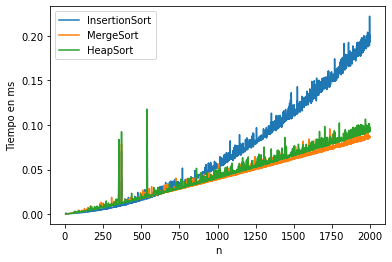

In [ ]:

import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

x=[]
y_insertion = []
y_merge = []
y_heap = []

for n in range(5,2000):

  a = random.sample(range(1, 2000), n)
  b = deepcopy(a)
  c = deepcopy(a)

  t_insertion = repeat(setup="from __main__ import bucketSortInt", stmt=f"bucketSortInt({a})", repeat=1, number=10)
  t_merge = repeat(setup="from __main__ import bucketSortIntMerge", stmt=f"bucketSortIntMerge({b})", repeat=1, number=10)
  t_heap = repeat(setup="from __main__ import bucketSortIntHeap", stmt=f"bucketSortIntHeap({c})", repeat=1, number=10)

  x.append(n)
  y_insertion.append(t_insertion)
  y_merge.append(t_merge)
  y_heap.append(t_heap)


plt.plot(x,y_insertion)
plt.plot(x,y_merge)
plt.plot(x,y_heap)

plt.legend(["InsertionSort", "MergeSort","HeapSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Se puede apreciar que dependiendo del algortimo de ordenamiento cambia el tiempo de ejecucion de BucketSort.
Tambien se ve que los que tienen menor tiempo de ejecucion son aquellos que individualmente tienen menor tiempo de ejecucion 



## 5.2. Tiempo de ejecución (experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **QuickSort** y **Merge sort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$, con el fin de comparar los tiempos de ejecucion y ver cual es mas eficiente en respecto del tiempo.



In [ ]:
def countingSort(arr, exp1):

	n = len(arr)

	output = [0] * (n)

	count = [0] * (10)

	for i in range(0, n):
		index = arr[i] // exp1
		count[index % 10] += 1

	for i in range(1, 10):
		count[i] += count[i - 1]

	i = n - 1
	while i >= 0:
		index = arr[i] // exp1
		output[count[index % 10] - 1] = arr[i]
		count[index % 10] -= 1
		i -= 1

	i = 0
	for i in range(0, len(arr)):
		arr[i] = output[i]

def radixSort(arr):

	max1 = max(arr)
	exp = 1
	while max1 / exp >= 1:
		countingSort(arr, exp)
		exp *= 10

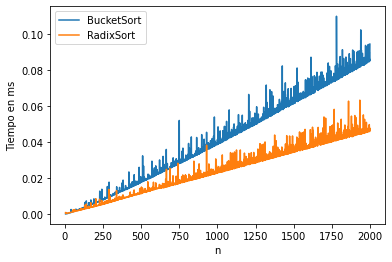

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

x=[]
y_bucketSort = []
y_radixSort = []


for n in range(5,2000):

  a = random.sample(range(1, 2000), n)
  b = deepcopy(a)


  t_bucketSort = repeat(setup="from __main__ import bucketSortIntMerge", stmt=f"bucketSortIntMerge({a})", repeat=1, number=10)
  t_radixSort = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({b})", repeat=1, number=10)


  x.append(n)
  y_bucketSort.append(t_bucketSort)
  y_radixSort.append(t_radixSort)


plt.plot(x,y_bucketSort)
plt.plot(x,y_radixSort)


plt.legend(["BucketSort","RadixSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Se puede ver que el radixsort y el bucketsort usando mergesort, se comportan ambas de formas lineal pero radixsort tiene un mejor rendimiento para arreglos de mayor tamaño.